In [5]:

import requests as re
import os 
import json
import twitter

consumer_key = os.environ["TWITTER_CONSUMER_KEY"]
consumer_secret = os.environ["TWITTER_CONSUMER_SECRET"]
access_token = os.environ["TWITTER_ACCESS_TOKEN"]
access_token_secret = os.environ["TWITTER_CONSUMER_SECRET"]


api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_token,
                  access_token_secret=access_token_secret)


print(type(api))

## FOLLOWING FUNCTION WILL COLLECT REAL-TIME TWEETS IN OUR COMPUTER

# data returned will be for any tweet mentioning strings in the list FILTER
FILTER = [":("]

# Languages to filter tweets by is a list. This will be joined by Twitter
# to return data mentioning tweets only in the english language.
LANGUAGES = ['en']
storage_location = "data/outputsadface.txt"
_location = ["-122.75,36.8","-121.75,37.8"]
def main():
    with open(storage_location, 'a') as f:
        # api.GetStreamFilter will return a generator that yields one status
        # message (i.e., Tweet) at a time as a JSON dictionary.
        for line in api.GetStreamFilter(track=FILTER, languages=LANGUAGES, locations=_location):
            f.write(json.dumps(line))
            f.write('\n')
            
main()

<class 'twitter.api.Api'>


In [ ]:
# Load into dataframe with labels

In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import ast
import json


In [6]:
# read sad data
f = open("data/outputsadface.txt", "r").readlines()
tweets = []
for i in range(len(f)):
    json_string = f[i]
    twit = json.loads(json_string)
    tweets.append(json.dumps(twit["text"]))#or any string manipulation here

In [7]:
df = pd.DataFrame(tweets)
df.columns = ['tweets']
df['sent'] = 0

In [8]:
df.head()


,tweets,sent
0,"""@lennysan Great question""",0
1,"""RT @pshobic: ni-ki's shoulders are sunoo's co...",0
2,"""@RatedEforEnder People will be like \""Please ...",0
3,"""good morning ! let's vote TXT on MAMA and tak...",0
4,"""all i can say is :(""",0


In [9]:
# read happy data
f = open("data/outputhappyface.txt", "r").readlines()
tweets = []
for i in range(len(f)):
    json_string = f[i]
    twit = json.loads(json_string)
    tweets.append(json.dumps(twit["text"]))#or any string manipulation here

In [10]:
df_h = pd.DataFrame(tweets)
df_h.columns = ['tweets']
df_h['sent'] = 1

In [11]:
df_h.head()

,tweets,sent
0,"""RT @btsinthemoment: YOONGI WEVERSE POST \n\n\...",1
1,"""How about you go and just fuck yourself :)""",1
2,"""RT @rosaaasss_: \u2014 Enhypen twitter polls ...",1
3,"""@Nathan_LaMorte my exact technique :)""",1
4,"""@cindyaintright @sweetjesus2000 I'm on a pc :)""",1


In [12]:
# combine dataframes
df = df.append(df_h)
df.head()


,tweets,sent
0,"""@lennysan Great question""",0
1,"""RT @pshobic: ni-ki's shoulders are sunoo's co...",0
2,"""@RatedEforEnder People will be like \""Please ...",0
3,"""good morning ! let's vote TXT on MAMA and tak...",0
4,"""all i can say is :(""",0


In [13]:
df.shape

(1218, 2)

In [14]:
# Clean - remove ", starts with @ any thing shorter than 3 letters, keep ? remove \n

In [15]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

import re
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Clean data

In [33]:
features = df.tweets.tolist()
processed_features = []

for sentence in range(0, len(features)):
    text= features[sentence]
#     print(text)
#     words = split 
    
#     text = text.strip('\"') - replace with " "
#     text = text.strip('\'')
    
    # anything starts with @  
#     text = re.sub(r'(\s)\@\w+', r'\1', text)
    text = ' '.join(word for word in text.split(' ') if not word.endswith('\\"'))
    text = text.replace("\'", " ") 
    text = text.replace('\"', " ") 
    text = ' '.join(word for word in text.split(' ') if not word.startswith('@'))
    text = ' '.join(word for word in text.split(' ') if not word.startswith('https'))
#     text = ' '.join(word for word in text.split(' ') if not word.contains('\\"'))

    # remove \\" and \\' 
    
    # Remove all the special characters
#     text = "".join([word.lower() for word in text if word not in string.punctuation])

    # Any words with numbers
    
    # Anything with less than 2 char
    text = ' '.join( [w for w in text.split() if len(w)>2] )

    # Substituting multiple spaces with single space
    text = text.lower()

    # Converting to Lowercase
#     text = text.split()
    processed_features.append(text)


In [34]:
# df['clean_tweet'] = df.tweets.apply(f)

In [35]:
processed_features[:10]

['great question',
 'ni-ki shoulders are sunoo comfort place',
 'people will like please stop you making and they like you right,\\u2026',
 'good morning let vote txt mama and take back our place. let this for our boys. \\n\\nfourth rank 7.05\\u2026',
 'all can say',
 'love',
 'it\\u2019s been almost two weeks',
 'ni-ki shoulders are sunoo comfort place',
 'omg arin and soobin wanted that',
 'gonna miss friends until next time! &lt;3']

In [36]:
features[:10]

['"@lennysan Great question"',
 '"RT @pshobic: ni-ki\'s shoulders are sunoo\'s comfort place :( https://t.co/9NPfkZ10Lc"',
 '"@RatedEforEnder People will be like \\"Please stop you\'re making me uncomfortable\\" And they\'ll be like \'You\'re right,\\u2026 https://t.co/eOO5y9InhP"',
 '"good morning ! let\'s vote TXT on MAMA and take back our place. let\'s do this for our boys. :( \\n\\nFOURTH RANK - 7.05\\u2026 https://t.co/FKv25j8kSt"',
 '"all i can say is :("',
 '"@onlyforlevi i love u :("',
 '"@filmrry it\\u2019s been almost two weeks :("',
 '"RT @pshobic: ni-ki\'s shoulders are sunoo\'s comfort place :( https://t.co/9NPfkZ10Lc"',
 '"@allkpop omg Arin and Soobin wanted that :("',
 '"RT @saladserns: gonna miss my friends :( until next time! &lt;3 https://t.co/cVoUL2lwVh"']

In [ ]:
# tokenize (split into words)

In [ ]:
# remove stopwords

In [ ]:
# dont do stemming or lemmetization
# nltk.download('punkt')
# from nltk.stem import WordNetLemmatizer  

## Bag of words

In [49]:
# (from lecture)

# from sklearn.feature_extraction.text import CountVectorizer
# vect = CountVectorizer()
# count_vectorizer_input=messages['text_nostop'].apply(lambda x: " ".join(x) ) # cleaned text



In [ ]:
# X = vect.fit_transform(messages['text_clean'].tolist(),count_vectorizer_input)
# X.toarray()
# X.shape

In [161]:
# # create document term matrix (from lecture)
# def create_doc_term_matrix(message_list,vectorizer):
#     doc_term_matrix = vectorizer.fit_transform(message_list)
#     return pd.DataFrame(doc_term_matrix.toarray(),
#                     columns = vectorizer.get_feature_names())

In [ ]:
# create_doc_term_matrix(messages['text_clean'].tolist(),CountVectorizer())

## OR TF-IDF

In [ ]:
# (from lecture)

In [ ]:

# from sklearn.feature_extraction.text import TfidfVectorizer

# create_doc_term_matrix(messages['text_clean'].tolist(),TfidfVectorizer())

In [162]:
# # clean data
# # Define a function to handle all data cleaning
# def clean_text(text):
#     text = "".join([word.lower() for word in text if word not in string.punctuation]) 
#     tokens = re.split('\W+', text)
#     text = [word for word in tokens if word not in stopwords]
#     #lememtization
#     #stemming
#     return text

In [48]:
# # Fit a basic TFIDF Vectorizer and view the results
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vect = TfidfVectorizer(analyzer=clean_text)
# X_tfidf = tfidf_vect.fit_transform(messages['text'])

# print(X_tfidf.shape)
# # print(tfidf_vect.get_feature_names())

## Vectorize

In [ ]:
# can choose different ones 
vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words=stopwords.words('english'))

In [ ]:
X=vectorizer.fit_transform(processed_features)
y = df.sent

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Model (NB)

In [40]:
clf=naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_pred = clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.8426229508196721

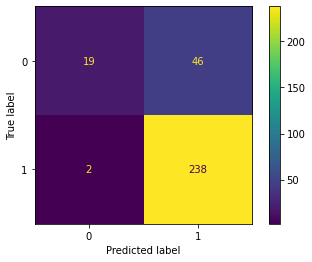

In [43]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

### Model Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.839344262295082


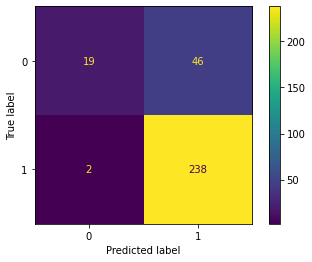

In [45]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.819672131147541


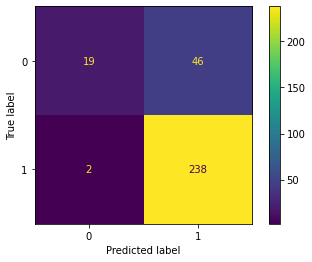

In [47]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

## Deep Learning 

In [ ]:
# ** NEED WORD EMBEDING!! BRING IN PRETRAINED MODEL! (SEE LECTURE OF GLOVE LIKE WALKTHROGH)

from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
# Visulalize
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [ ]:
# Use word embedding?? look at NLP with deep learning walkthrough